# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados.

El conjunto de datos es generado de manera aleatoria.

### 0. Imports

In [1]:
# Instalacion de librerías externas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

### 1. Generación del conjunto de datos


In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

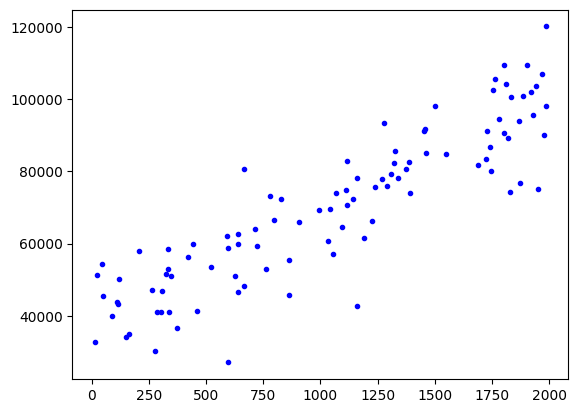

In [32]:
plt.plot(X, y, "b.") # solid blue dot
plt.show()

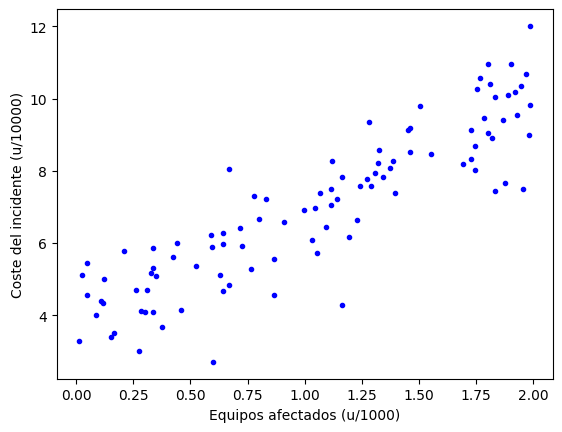

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

### 3. Modificación del conjunto de datos

In [6]:
import pandas as pd

In [7]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()} # Return a copy of the array collapsed into one dimension. (titulo)

df = pd.DataFrame(data) # creamos el dataframe
df.head(10)

,n_equipos_afectados,coste
0,0.667755,4.830278
1,1.116385,7.061372
2,0.048892,4.549591
3,1.094083,6.459351
4,0.087620,4.000745
5,0.596026,5.891723
6,1.320161,8.231779
7,1.044047,6.965539
8,0.668493,8.066189
9,1.888213,10.100191


In [8]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')

# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int') # imaginemos MXN

df.head(10)

,n_equipos_afectados,coste
0,667,48302
1,1116,70613
2,48,45495
3,1094,64593
4,87,40007
5,596,58917
6,1320,82317
7,1044,69655
8,668,80661
9,1888,101001


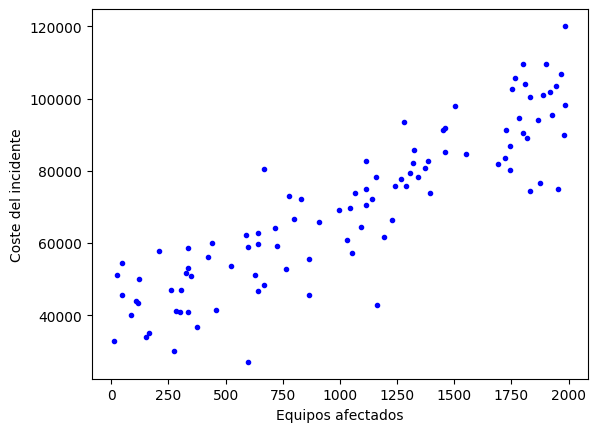

In [9]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

In [37]:
print(df['n_equipos_afectados'].values.reshape(-1, 1))

print(df['coste'].values)

[[ 667]
 [1116]
 [  48]
 [1094]
 [  87]
 [ 596]
 [1320]
 [1044]
 [ 668]
 [1888]
 [ 628]
 [ 307]
 [1830]
 [1393]
 [ 276]
 [ 640]
 [1868]
 [1162]
 [1067]
 [ 263]
 [ 460]
 [ 301]
 [ 523]
 [1503]
 [1979]
 [1745]
 [ 165]
 [ 864]
 [1929]
 [ 725]
 [ 996]
 [ 596]
 [  47]
 [ 799]
 [ 349]
 [ 285]
 [ 121]
 [1691]
 [1902]
 [1386]
 [ 641]
 [1460]
 [1969]
 [1954]
 [  24]
 [  14]
 [ 334]
 [ 640]
 [1113]
 [ 779]
 [ 441]
 [ 115]
 [ 423]
 [ 764]
 [1754]
 [1832]
 [1269]
 [1986]
 [ 828]
 [1874]
 [ 864]
 [ 591]
 [1453]
 [ 326]
 [1142]
 [1943]
 [ 110]
 [1819]
 [ 334]
 [1279]
 [1724]
 [1054]
 [1290]
 [1326]
 [1340]
 [1743]
 [1551]
 [1458]
 [1802]
 [1921]
 [1985]
 [1116]
 [ 208]
 [ 150]
 [1811]
 [1766]
 [ 337]
 [ 373]
 [1240]
 [1193]
 [1226]
 [1782]
 [1160]
 [1373]
 [1728]
 [1308]
 [1802]
 [1032]
 [ 907]
 [ 715]]
[ 48302  70613  45495  64593  40007  58917  82317  69655  80661 101001
  51045  47003  74345  73917  30160  46592  94094  42838  73951  47094
  41427  40933  53612  98040  90073  80116  35104  55530 

### 4. Construcción del modelo

In [63]:
from sklearn.linear_model import LinearRegression

In [95]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)

LinearRegression()

In [96]:
# Parámetro theta 0
print(lin_reg.intercept_)

37514.751311183325


In [97]:
# Parámetro theta 1
lin_reg.coef_

array([30.99126983])

In [98]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

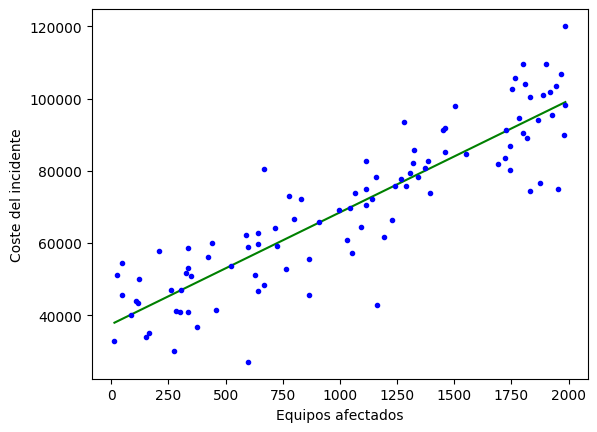

In [99]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 5. Predicción de nuevos ejemplos

In [100]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new)

print("El coste del incidente sería:", int(coste[0]), "MXN")

El coste del incidente sería: 77803 MXN


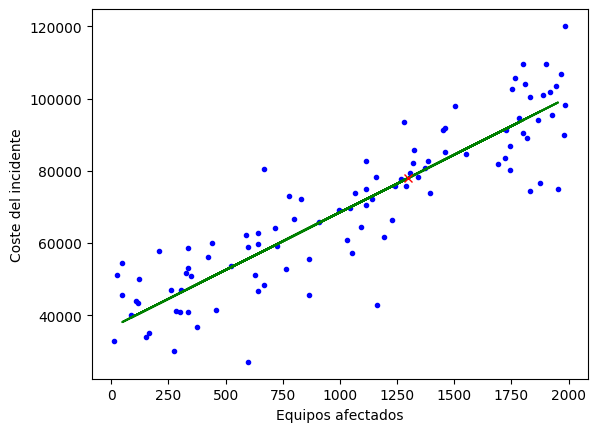

In [94]:
plt.plot(X, y, "b.")
plt.plot(X_test, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()